# One-sample t-test for the mean

The goal of the one-sample $t$-test to check if the mean $\mu$ of an unknown population $X \sim \mathcal{N}(\mu, \sigma_0)$,
equals the mean $\mu_0$ of a theoretical distribution $X_0 \sim \mathcal{N}(\mu_0, \sigma_0)$.
We'll estimate the standard deviation $\sigma_0$ from the sample standard deviation $\mathbf{s}_{\mathbf{x}}$.
We discussed this hypothesis test in [notebooks/34_analytical_approx.ipynb](../notebooks/34_analytical_approx.ipynb).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

## Data
One sample of numerical observations $\mathbf{x}=[x_1, x_2, \ldots, x_n]$.

## Modeling assumptions

We model the unknown population as...

and the theoretical distribution is...




We assume the population is normally distributed $\textbf{(NORM)}$,
or the sample is large enough $\textbf{(LARGEn)}$.

We also assume that the variance of the unknown population is known and equal to the variance of the theoretical population under $H_0$
<!-- $\sigma_{X_0}^2$ is known. -->

## Hypotheses

$H_0: \mu = \mu_0$ and $H_A: \mu \neq \mu_0$,
where $\mu$ is the unknown population mean,
$\mu_0$ is the theoretical mean we are comparing to.

## Statistical design

for $n=5$ ...


for $n=20$ ...


## Estimates

Calculate the sample mean $\overline{\mathbf{x}} = \Mean(\mathbf{x})$
and the sample standard deviation $s_{\mathbf{x}} = \Std(\mathbf{x})$.
We can then calculate the estimated standard error of the mean
$\stderrhat{\overline{\mathbf{x}}} =  \frac{ s_{\mathbf{x}} }{ \sqrt{n} }$. 

## Test statistic

Compute $t = \frac{\overline{\mathbf{x}} - \mu_0}{ \stderrhat{\overline{\mathbf{x}}} }$ from
the sample mean $\overline{\mathbf{x}}$,
the theoretical population mean $\mu_0$,
the estimated standard error $\stderrhat{\overline{\mathbf{x}}}$. 

## Sampling distribution

Student's $t$-distribution with $\nu=n-1$ degrees of freedom.

## P-value calculation

In [3]:
from ministats import ttest_mean

%psource ttest_mean

def ttest_mean(sample, mu0, alt="two-sided"):
    """
    T-test to detect mean deviation from a population with known mean `mu0`.
    """
    assert alt in ["greater", "less", "two-sided"]
    obsmean = np.mean(sample)
    n = len(sample)
    std = np.std(sample, ddof=1)
    sehat = std / np.sqrt(n)
    obst = (obsmean - mu0) / sehat
    rvT = tdist(df=n-1)
    pvalue = tailprobs(rvT, obst, alt=alt)
    return pvalue


To perform the one-sample $t$-test on the sample `xs`,
we call `ttest_mean(xs, mu0=...)`,
with `...` replaced by the expected mean $\mu_{X_0}$ of the theoretical population under $H_0$

## Examples

For all the examples we present below,
we assume the theoretical distribution we expect under the null hypothesis,
is normally distributed with mean $\mu_{X_0}=100$
and standard deviation $\sigma_{X_0} =  5$:

$$
    \texttt{rvX0} = X_0 \sim \mathcal{N}(100,5).
$$



In [4]:
from scipy.stats import norm
muX0 = 100
sigmaX0 = 5
rvX0 = norm(muX0, sigmaX0)

### Example A: population different from $H_0$

Suppose the unknown population is normally distributed 
with mean $\mu_{X_A}=104$
and standard deviation $\sigma_{X_A} = 3$:

$$
    \texttt{rvXA} = X_A \sim \mathcal{N}(110,3).
$$

In [5]:
muXA = 104
sigmaXA = 3
rvXA = norm(muXA, sigmaXA)

Let's generate a sample `xAs` of size $n=20$ from the random variable $X = \texttt{rvXA}$.

In [6]:
np.random.seed(42)

# generate a random sample of size n=20
n = 20
xAs = rvXA.rvs(n)
xAs

array([105.49014246, 103.5852071 , 105.94306561, 108.56908957,
       103.29753988, 103.29758913, 108.73763845, 106.30230419,
       102.59157684, 105.62768013, 102.60974692, 102.60281074,
       104.72588681,  98.26015927,  98.8252465 , 102.31313741,
       100.96150664, 104.942742  , 101.27592777,  99.7630889 ])

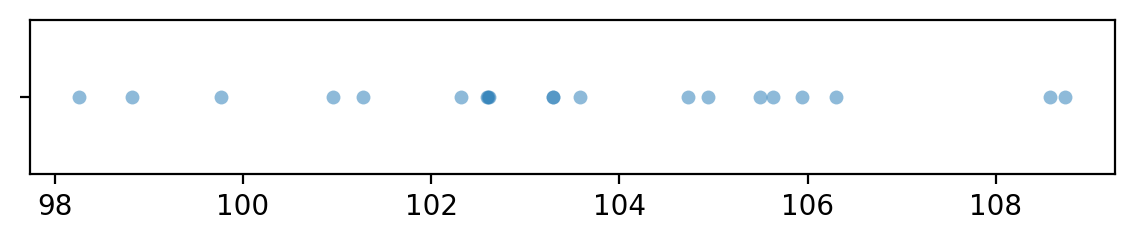

In [7]:
import seaborn as sns
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xAs, jitter=0, alpha=0.5)

To obtain the $p$-value,
we first compute the observed $t$-statistic,
then calculate the tail probabilities in the two tails of the standard normal distribution $T_0 \sim \mathcal{T}(\nu)$.

In [8]:
from scipy.stats import t as tdist

obsmean = np.mean(xAs)
std = np.std(xAs, ddof=1)
sehat = std / np.sqrt(n)
obst = (obsmean - muX0) / sehat
rvT0 = tdist(df=n-1)
pvalue = rvT0.cdf(-obst) + 1-rvT0.cdf(obst)
obst, pvalue

(5.413149619618617, 3.186228235607658e-05)

The helper function `ttest_mean` from the `ministats` module performs
exactly the same sequence of steps to compute the $p$-value.

In [9]:
from ministats import ttest_mean
ttest_mean(xAs, mu0=muX0)

3.1862282356088544e-05

The $p$-value we obtain is 0.00003186,
which is below the cutoff value $\alpha=0.05$,
so our conclusion is **we reject the null hypothesis**:
the mean of the sample `xAs` is not statistically significantly different from the theoretically expected mean $\mu_{X_0} = 100$.

### Example B: sample from a population as expected under $H_0$

In [10]:
# unknown population X = X0
rvXB = norm(muX0, sigmaX0)

Let's generate a sample `xBs` of size $n=20$ from the random variable $X = \texttt{rvX}$,
which has the same distribution as the theoretical distribution we expect under the null hypothesis.

In [11]:
# np.random.seed(32)  produces false positie
np.random.seed(31)

# generate a random sample of size n=20
n = 20
xBs = rvXB.rvs(n)
xBs

array([ 97.92621393,  98.33315666, 100.40545993,  96.04486524,
        98.90700164,  96.18401578,  96.11439878, 109.24678261,
        96.47199845,  99.56978983, 101.43966651,  99.34306739,
        95.08627924,  95.40604357, 105.99717245,  98.29312879,
        91.20696344, 100.25558735,  97.14035504,  96.49716979])

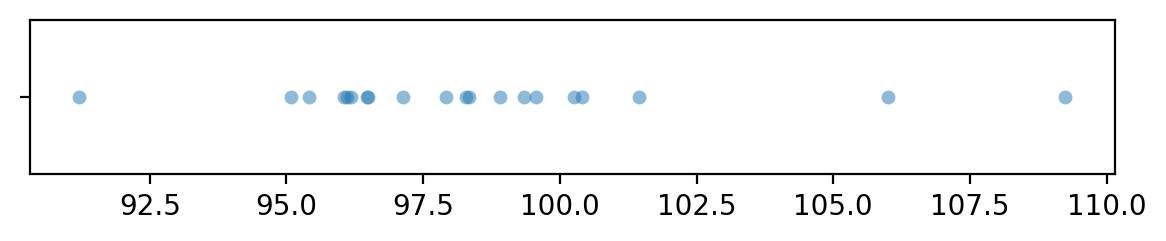

In [12]:
import seaborn as sns
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xBs, jitter=0, alpha=0.5)

In [13]:
from ministats import ttest_mean
ttest_mean(xBs, mu0=muX0)

0.1013574486082352

The $p$-value we obtain is 0.10, which is above the cutoff value $\alpha=0.05$
so our conclusion is that we've **failed to reject the null hypothesis**:
the mean of the sample `xBs` is not significantly different from the theoretically expected mean $\mu_{X_0} = 100$.

## Confidence interval for the unknown mean

In [14]:
from ministats import ci_mean

The confidence interval for the unknown population mean $\mu_A$ in Example A is:

In [15]:
ci_mean(xAs, alpha=0.1, method='a')

[102.3725312980782, 104.59967733327082]

In [16]:
ci_mean(xBs, alpha=0.1, method='a')

[96.98044495642183, 100.00646668579604]

## Effect size estimates

## Related

- Use the one-sample $z$-test if the population standard deviation is known

## Discussion

## Links